Proyecto Final - Data Scientist Coderhouse
Emilse Bover

*La producción de pollos parrilleros en Argentina se encuentra concentrada en unas pocas empresas y la mayoría de ellas son de tipo familiar. Las más grandes realizan todos los procesos de la cadena de producción: desde las cabañas de la genética (Abuelos) hasta la distribución en los puntos finales del producto terminado: cadenas de supermercados, minoristas, consumidor directo y puertos (productos de exportación).Los pollos parrilleros se crían en granjas conformadas por galpones en los que se ingresan los animales recién nacidos (pollitos BB), las empresas productoras proveen todos los insumos necesarios para la crianza (alimento, medicamentos, desinfectantes, material de cama, servicios de limpieza, entre otros) y el encargado o dueño de la granja (integrado) se ocupa del manejo de las aves y su ambiente (provisión de agua, alimento, condiciones de temperatura y humedad, etc.). La duración del ciclo de crianza es de aproximadamente 48 días y el peso final de alrededor de 2.8 Kilos. La empresa productora retira los animales para llevarlos al frigorífico. 
La producción se analiza en función de la eficiencia productiva de cada crianza. Una mayor eficiencia significa lograr un animal de mayor peso con el menor consumo de alimento posible ya que el alimento constituye aproximadamente el 70% del costo de producción. La relación alimento consumido/peso final logrado es la conversión alimenticia. El impacto de la mortalidad es negativo y es creciente con la edad: a mayor edad, más cantidad de alimento habrá consumido sin producir kilos.*
*La edad a faena está condicionada por la demanda del sector de ventas: tamaño de las aves, cantidad de kilos; por el ritmo de crecimiento (ganancia media diaria de peso) y por las condiciones sanitarias (enfermedades).
El valor de conversión como indicador productivo tiene la limitación de que no puede ser utilizado para comparar resultados entre granjas y períodos de tiempo por depender de la edad, el peso final y la mortalidad.
Debido a ello se utilizan otros parámetros como la ganancia media diaria de peso (A.D.), la conversión ajustada a un peso teórico (Conversión aj. a 2.7 kg) y la relación Peso/Conversión.*

*El resultado productivo será la resultante de la interacción de los siguientes factores:
•La genética: La línea genética de las aves, el origen y edad de los reproductores (padres), el tipo de huevo que dio origen a los pollitos BB.
•La nutrición: La composición de la dieta, la calidad de las materias primas utilizadas.
•El ambiente: El tipo de galpón de crianza (convencional, ambiente controlado), las condiciones de temperatura y humedad y la disponibilidad de recursos: comederos, bebederos, ventiladores, etc.
•La sanidad: Planes de vacunación y salud intestinal, medicaciones, lavado y desinfección, aplicación de medidas de bioseguridad, etc.
El planteo del presente trabajo es analizar los diferentes factores que impactan sobre los resultados de ganancia media diaria de peso y sugerir acciones de manejo para mejorar los valores de este indicador productivo.*

**Definición de objetivo**
El objetivo del presente trabajo es detectar el impacto de los factores que afectan al crecimiento de los pollos parrilleros para tomar decisiones que mejoren los resultados productivos. 

**Contexto comercial**
El retorno económico de la empresa productora de pollos parrilleros depende de la obtención de mejores resultados productivos. A mayor ganancia de peso diaria, por ejemplo, el consumo total de alimento será menor disminuyendo el costo. Otro impacto positivo del aumento de la ganancia de peso diaria es que se reduce la edad a faena de los animales ya que se alcanza el peso deseado en menor cantidad de días. Esta reducción de días permite: liberación de superficie de producción (metros cuadrados de galpón, rotación), menor propensión a sufrir enfermedades y accidentes (por ejemplo cortes de luz). También el dueño de la granja tiene menores costos de luz y gas y por lo tanto mayores ganancias finales también.

**Problema comercial**
La empresa plantea los siguientes interrogantes: ¿Por qué la ganancia de peso no es similar en todas las granjas? ¿Por qué tampoco es uniforme a lo largo del año? ¿Es posible predecir el crecimiento en el futuro? ¿El alimento es el adecuado? ¿Qué tiene mayor impacto, el alimento o las condiciones del ambiente? ¿Es posible mejorar los valores de ganancia de peso manteniendo iguales las condiciones de genética, nutrición y ambiente (en el sentido estricto de la localización geográfica de las granjas).

**Contexto analítico**
La empresa ha provisto un archivo excel con información de resultados y otros parámetros con localización geográfica, tipo de granja y zona de producción.

**Exploración de datos**
Se realizarán gráficos para explorar los datos provistos.

Importación de librerías

In [1]:
import numpy as np
import pandas as pd
#import pandas_profiling
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import xlsxwriter
import datetime
import statsmodels.api as sm
import requests
import json
import plotly.express as px
import ydata_profiling
from matplotlib import rcParams
from numpy import mean
from numpy import std

# Para modelaje:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import VotingRegressor
from imblearn import FunctionSampler
from sklearn import metrics
%pip install ipython-autotime
%load_ext autotime
import pickle
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import preprocessing


time: 0 ns (started: 2023-06-30 14:35:10 -03:00)


Base de datos

In [2]:
#Ingresos semanales compilado registra resultados finales de la producción en la pestaña BASE. Contiene además datos de genética, nutrición y sanidad.
df = pd.read_excel(r"C:\Users\ebover\OneDrive - FRIGORIFICO DE AVES SOYCHU S.A.I.C.F.I.A\ingresos semanales compilado.xlsx",sheet_name='BASE', skiprows=1 , usecols=range(1,67))

time: 19.9 s (started: 2023-06-30 14:35:10 -03:00)


Feature extraction preliminar

In [3]:
df.drop(df[(df['A.D.'] >100)].index, inplace=True) #Se eliminan valores erróneos
df.drop(df[(df['Edad'] >70)].index, inplace=True) #Se elimninan edades fuera de estándar
df.drop(df[(df['Destino'] =='EXP')].index, inplace=True) # se eliminan crianzas de pollos enviados a exportación

time: 62 ms (started: 2023-06-30 14:35:30 -03:00)


In [4]:
df.shape

(14702, 66)

time: 15 ms (started: 2023-06-30 14:35:30 -03:00)


In [5]:
df.head()

,granja,Nombre,Primer BB,Cantid. BB,A Faena,% a 7 Días,% Mortan.,% Fal.,Kg. Pollo,P. Prom.,...,Índice,nd,zona climática,Cuartil EFS 2021,conv aj aviagen 2021,conv aj AVIAGEN,hepatitis,consumo total,"Pes conv 2,7",zona prod
0,2544,"""GRANJA DON MIGUEL""",2014-11-13,36000,34964,0.55,2.88,-0.33,93360,2.670175,...,6,NaN,Arrecifes,NaN,2.133946,2.134802,NaN,5.682216,1.262878,BA
1,2558,LA MAMA,2014-11-07,57500,54217,0.83,5.71,-0.26,145260,2.679233,...,7,NaN,Arrecifes,NaN,2.315835,2.316431,NaN,6.193629,1.164476,BA
2,2761,LOS CHOCHOS,2014-11-13,39000,36483,0.92,6.45,-0.48,100360,2.750870,...,8,NaN,25 de mayo,NaN,2.266716,2.265256,NaN,6.263191,1.194771,BA
3,2524,GRANJA DIAMANTE,2014-11-14,30000,28231,1.35,5.90,1.07,77514,2.745705,...,15,NaN,Arrecifes,NaN,2.263520,2.262208,NaN,6.239843,1.196094,BA
4,2741,KBB ARRECIFES SA,2014-11-14,42000,38912,0.76,7.35,0.19,120920,3.107525,...,21,NaN,Arrecifes,NaN,2.189003,2.177307,NaN,7.053505,1.265246,BA


time: 31 ms (started: 2023-06-30 14:35:30 -03:00)


La base de datos posee 14.629 filas, cada una de las cuáles representa una crianza de una granja. La base tiene 66 columnas con información sobre las características de la granja, su ubicación y los resultados de producción obtenidos.

In [6]:
def df_explore(df):
    # Tabla de descripción de las principales características de cada columna de un conjunto de datos
    print( 'Shape: ', df.shape)

    t = PrettyTable(['Variable',
                     'Tipo',
                     'Cant. No Nulos',
                     'Cant. Nulos',
                     '% Nulos',
                     'Valores Únicos',
                     'Ejemplo',
                    ])

    for c in df.columns:
        t.add_row([c,                                                                                         # Variable
                   df[c].dtype,                                                                               # tipo
                   len(df[c])-np.sum(df[c].isna().sort_values(ascending=False)),                              # Cant. No Nulos
                   np.sum(df[c].isna()),                                                                 # Cant. Nulos
                   np.round(df[c].isna().sort_values(ascending=False).sum()/len(df)*100, 2),        # % Nulos
                   np.count_nonzero(df[c].unique()),                                                          # Valores Únicos
                   df[~df[c].isnull()][c].iloc[0],                                                            # Ejemplo
                  ])
    print(t)
    print()
    return

df_explore(df)

Shape:  (14702, 66)
+------------------------------+----------------+----------------+-------------+---------+----------------+---------------------+
|           Variable           |      Tipo      | Cant. No Nulos | Cant. Nulos | % Nulos | Valores Únicos |       Ejemplo       |
+------------------------------+----------------+----------------+-------------+---------+----------------+---------------------+
|            granja            |     int64      |     14702      |      0      |   0.0   |      753       |         2544        |
|            Nombre            |     object     |     14702      |      0      |   0.0   |      784       | "GRANJA DON MIGUEL" |
|          Primer BB           | datetime64[ns] |     14702      |      0      |   0.0   |      1974      | 2014-11-13 00:00:00 |
|          Cantid. BB          |     int64      |     14702      |      0      |   0.0   |      2397      |        36000        |
|           A Faena            |     int64      |     14702      |    

Análisis exploratorio de datos

### Histograma de ganancia media diaria de peso (A.D.)

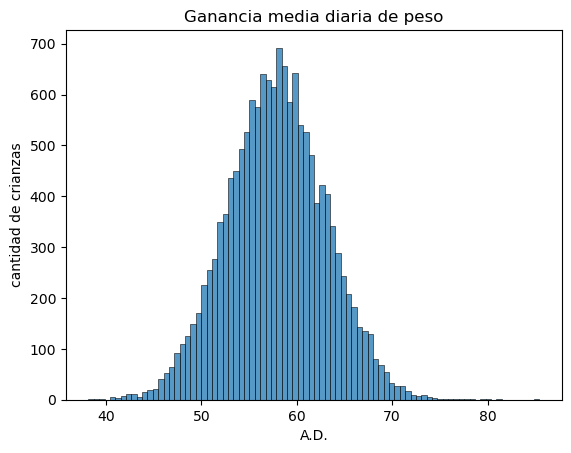

time: 718 ms (started: 2023-06-30 14:35:31 -03:00)


In [7]:
#Gráfico 1
#Histograma de Ganancia media diaria de peso#
ax=sns.histplot(data=df, x='A.D.')
ax.set(title='Ganancia media diaria de peso', ylabel='cantidad de crianzas');

In [8]:
df['A.D.'].mean()


57.86142111639684

time: 16 ms (started: 2023-06-30 14:35:31 -03:00)


La **ganancia media diaria de peso** es una medida que permite comparar resultados entre granjas y además permite ver la evolución de los resultados globales de la empresa a lo largo del tiempo. A mayor valor, mejor será el resultado. El valor medio es de **57.87** gramos de peso ganados promedio por día.

### A.D. por año

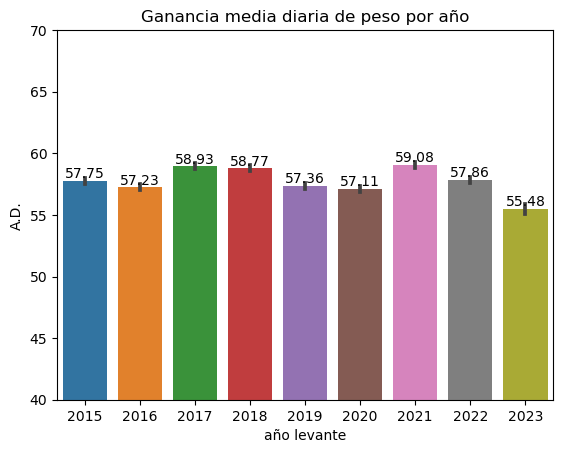

time: 688 ms (started: 2023-06-30 14:35:31 -03:00)


In [9]:
# Gráfico 2
ax=sns.barplot(data=df, x='año levante',y='A.D.') 
ax.bar_label(ax.containers[0],fmt='%.2f')
ax.set(ylim=(40, 70))
ax.set(title='Ganancia media diaria de peso por año');

Se observa que las ganancias de peso de los años 2017 y 2021 fueron superiores al resto de los años analizados. 

### A.D. por estación del año

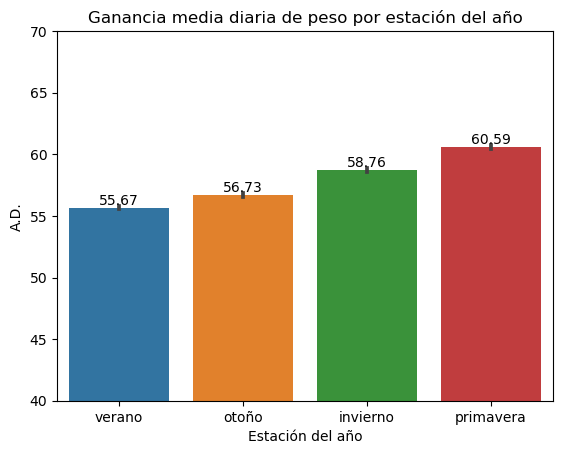

time: 453 ms (started: 2023-06-30 14:35:32 -03:00)


In [10]:
# Gráfico 3
ax=sns.barplot(data=df, x='Estación del año',y='A.D.') 
ax.bar_label(ax.containers[0],fmt='%.2f')
ax.set(ylim=(40, 70))
ax.set(title='Ganancia media diaria de peso por estación del año');

Se observa que la ganancia de peso es variable según la estación del año en la que se desarrolle la crianza, las mayores ganancias de peso ocurren en primavera y las peores en verano dando indicios de que el ambiente puede estar afectando el resultado productivo.

### A.D. por mes del año

In [11]:
dic={1:'ene',2:'feb', 3:'mar',4:'abr',5:'may', 6:'jun',7:'jul',8:'ago',9:'sep', 10:'oct',11:'nov', 12:'dic'}
dic

{1: 'ene',
 2: 'feb',
 3: 'mar',
 4: 'abr',
 5: 'may',
 6: 'jun',
 7: 'jul',
 8: 'ago',
 9: 'sep',
 10: 'oct',
 11: 'nov',
 12: 'dic'}

time: 0 ns (started: 2023-06-30 14:35:33 -03:00)


In [12]:
#subset para mes del año
df_3=df[['A.D.','mes levante']]
df_3=df_3.groupby('mes levante').mean().reset_index().round(1)

time: 16 ms (started: 2023-06-30 14:35:33 -03:00)


In [13]:
df_3 = df_3.replace({'mes levante': dic})

time: 16 ms (started: 2023-06-30 14:35:33 -03:00)


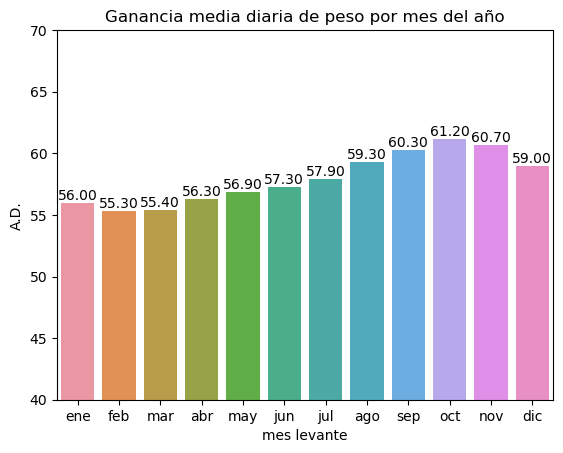

time: 265 ms (started: 2023-06-30 14:35:33 -03:00)


In [14]:
# Gráfico 4
ax=sns.barplot(data=df_3, x='mes levante',y='A.D.') 
ax.set(ylim=(40, 70))
ax.bar_label(ax.containers[0],fmt='%.2f')
ax.set(title='Ganancia media diaria de peso por mes del año');

Se observan también diferencias en los valores de ganancia media diaria de peso en los meses del año. Debido a ello a continuación se realizará un análisis según los tipos de ventilación que poseen las granjas.

Para ello se han clasificado las granjas en tres categorías:

S: Ventilación forzada: La ventilación del galpón se realiza a través de la entrada del aire por inlets o aberturas en la zona superior de los galpones y su posterior expulsión por extractores.

N: Granjas con sistema de ventilación convencional con encendido manual de ventiladores y/o apertura y cierre de las cortinas laterales del galpón.

MI: Mixtas: Granjas que tienen ambos tipos de galpones.

### Histograma A.D. por tipo de ventilación

In [15]:
# Datos para gráfico 5
serie1 =  df.loc[df['Ventilación forzada'] == 'N' ,'A.D.']
serie2 =  df.loc[df['Ventilación forzada'] == 'S' ,'A.D.']
serie3 =  df.loc[df['Ventilación forzada'] == 'MI' ,'A.D.']

time: 15 ms (started: 2023-06-30 14:35:33 -03:00)


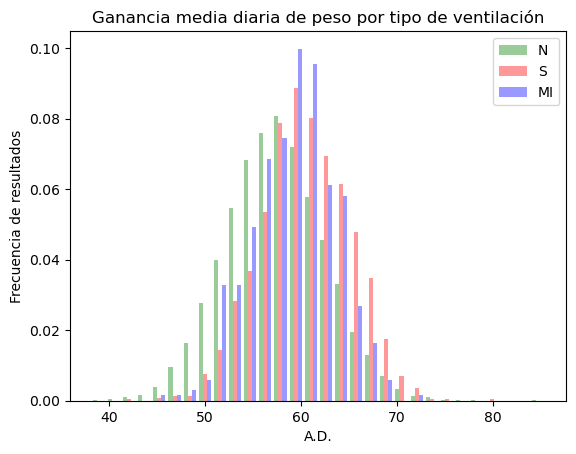

time: 344 ms (started: 2023-06-30 14:35:33 -03:00)


In [16]:
# Gráfico 5
plt.hist([serie1, serie2, serie3], bins=30, density= True, color=['green', 'red','blue'], alpha=0.4)
plt.title('Ganancia media diaria de peso por tipo de ventilación')
plt.xlabel('A.D.')
plt.ylabel('Frecuencia de resultados')
plt.legend(['N', 'S','MI']);

### A.D. por sistema de ventilación 

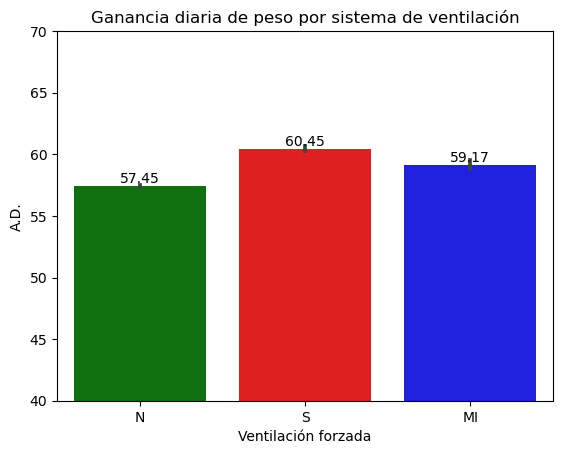

time: 282 ms (started: 2023-06-30 14:35:33 -03:00)


In [17]:
# Gráfico 6
ax=sns.barplot(data=df, x='Ventilación forzada',y='A.D.', order=['N','S','MI'], palette=['green', 'red','blue']) 
ax.bar_label(ax.containers[0],fmt='%.2f')
ax.set(ylim=(40, 70))
ax.set(title='Ganancia diaria de peso por sistema de ventilación');

Habría indicios de que el sistema de ventilación tiene impacto sobre la ganancia de peso de los animales.

### A.D. por zona de producción

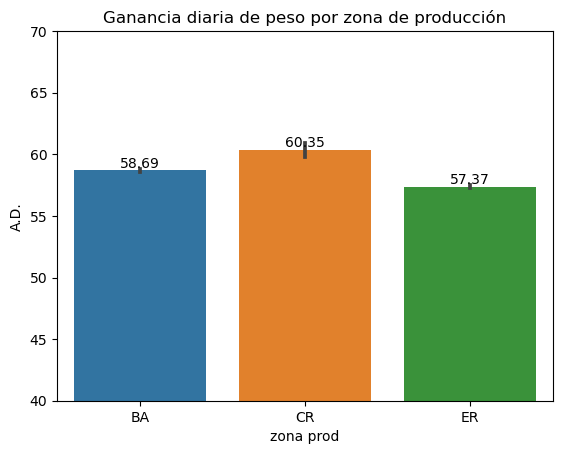

time: 266 ms (started: 2023-06-30 14:35:34 -03:00)


In [18]:
# Gráfico 7
ax=sns.barplot(data=df, x='zona prod',y='A.D.') 
ax.bar_label(ax.containers[0],fmt='%.2f')
ax.set(ylim=(40, 70))
ax.set(title='Ganancia diaria de peso por zona de producción');

A nivel de promedios, hay diferencias entre las zonas del país donde se encuentran ubicadas las granjas.

### A.D. por zona de producción dispersión

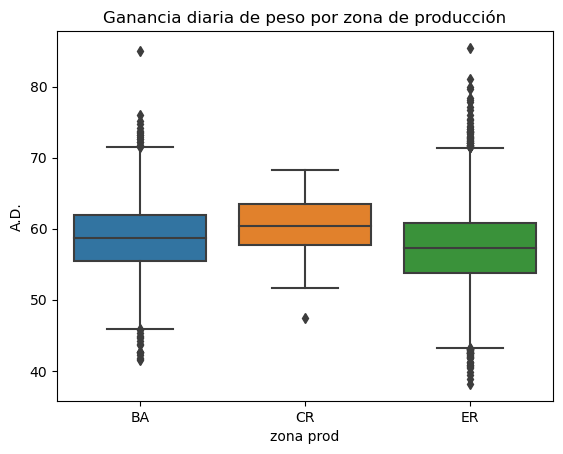

time: 125 ms (started: 2023-06-30 14:35:34 -03:00)


In [19]:
# Gráfico 8
ax=sns.boxplot(data=df, x='zona prod', y='A.D.') 
ax.set(title='Ganancia diaria de peso por zona de producción');

Los mejores resultados se encuentran en la zona de Crespo (CR), no solo porque tiene mayores valores de ganancia de peso sino también porque los resultados tienen menor dispersión y prácticamente no posee resultados atípicos.

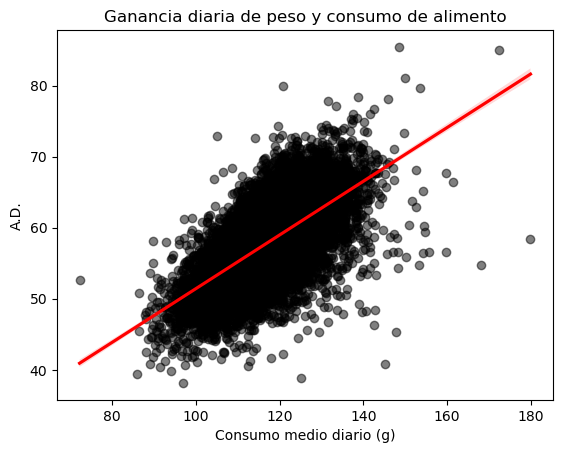

time: 1 s (started: 2023-06-30 14:35:34 -03:00)


In [20]:
# Gráfico 9
ax=sns.regplot(data=df, x = 'Consumo medio diario (g)', y = 'A.D.',
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99)
ax.set(title='Ganancia diaria de peso y consumo de alimento');





In [21]:
df['A.D.'].corr(df['Consumo medio diario (g)'])

0.6441996537292715

time: 0 ns (started: 2023-06-30 14:35:35 -03:00)


Se observa una correlación considerable entre la ganancia media diaria de peso y el consumo de alimento. Debido a ello se utilizará la variable Consumo medio diario de alimento (g) como variable dependiente en los modelos de machine learning de regresión que se probarán.

Preparación de los datos

In [22]:
#subset para modelo
dfm=df[['Días de receso corregido','granja','Cantid. BB','% a 7 Días','% Mortan.','Edad','mes levante','Consumo medio diario (g)','Estación del año','Densidad','Ventilación forzada','Ambiente controlado','localidad','zona climática','zona prod' ]]
dfm.head()

,Días de receso corregido,granja,Cantid. BB,% a 7 Días,% Mortan.,Edad,mes levante,Consumo medio diario (g),Estación del año,Densidad,Ventilación forzada,Ambiente controlado,localidad,zona climática,zona prod
0,14,2544,36000,0.55,2.88,49.0,1,115.963592,verano,12.000000,S,N,San Pedro,Arrecifes,BA
1,12,2558,57500,0.83,5.71,52.9,1,117.081839,verano,10.454545,N,N,Salto,Arrecifes,BA
2,11,2761,39000,0.92,6.45,49.0,1,127.820226,verano,9.470000,N,N,Chivilcoy,25 de mayo,BA
3,9,2524,30000,1.35,5.90,49.0,1,127.343729,verano,10.000000,N,N,San Pedro,Arrecifes,BA
4,10,2741,42000,0.76,7.35,51.0,1,138.304026,verano,10.769231,N,N,Arrecifes,Arrecifes,BA


time: 31 ms (started: 2023-06-30 14:35:35 -03:00)


In [23]:
dfm.shape

(14702, 15)

time: 16 ms (started: 2023-06-30 14:35:35 -03:00)


Se seleccionan las variables que pueden tener impacto en el consumo de alimento.

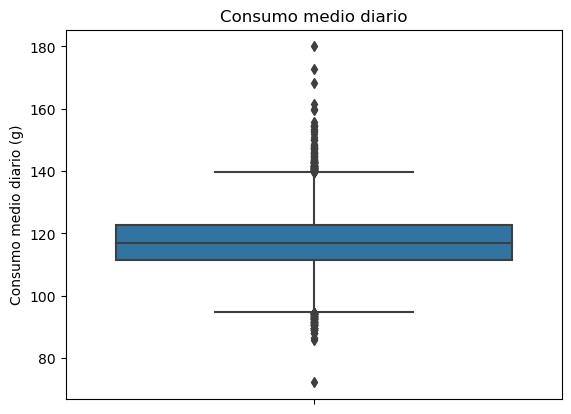

time: 203 ms (started: 2023-06-30 14:35:35 -03:00)


In [24]:
#Gráfico 10
ax=sns.boxplot(data=dfm, y='Consumo medio diario (g)') 
ax.set(title='Consumo medio diario');

Se observa una gran cantidad de valores outliers para la variable consumo por lo se generarán dos subsets para analizarlos por separado: 
dfmwo= Base de datos sin valores outliers
dfmout= Base de datos compuesta únicamente por valores outliers

In [25]:
# Encontramos el Q1, Q3, y el rango intercuartílico para cada columna
from scipy import stats


Q1 = dfm['Consumo medio diario (g)'].quantile(q=.25)
Q3 = dfm['Consumo medio diario (g)'].quantile(q=.75)
IQR = Q3-Q1

# Solo mantenemos filas que esten dentro de 1.5*IQR de Q1 y Q3
dfm = dfm[~((dfm['Consumo medio diario (g)'] < (Q1-1.5*IQR)) | (dfm['Consumo medio diario (g)'] > (Q3+1.5*IQR)))]

# Calculamos cuantas filas desaparecerian
dfm.shape


(14496, 15)

time: 16 ms (started: 2023-06-30 14:35:35 -03:00)


In [26]:
Q1

111.34920212765958

time: 0 ns (started: 2023-06-30 14:35:35 -03:00)


In [27]:
Q3

122.63551643148399

time: 0 ns (started: 2023-06-30 14:35:35 -03:00)


In [28]:
IQR

11.286314303824412

time: 0 ns (started: 2023-06-30 14:35:35 -03:00)


In [29]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14496 entries, 0 to 15821
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Días de receso corregido  14496 non-null  int64  
 1   granja                    14496 non-null  int64  
 2   Cantid. BB                14496 non-null  int64  
 3   % a 7 Días                14496 non-null  float64
 4   % Mortan.                 14496 non-null  float64
 5   Edad                      14496 non-null  float64
 6   mes levante               14496 non-null  int64  
 7   Consumo medio diario (g)  14496 non-null  float64
 8   Estación del año          14496 non-null  object 
 9   Densidad                  14496 non-null  float64
 10  Ventilación forzada       14496 non-null  object 
 11  Ambiente controlado       14496 non-null  object 
 12  localidad                 14496 non-null  object 
 13  zona climática            14496 non-null  object 
 14  zona prod  

# Encoding

## Transformaciones categóricas

In [30]:
encoder = OneHotEncoder()
data = encoder.fit_transform(dfm['Estación del año'].values.reshape(-1, 1))
data
data = encoder.fit_transform(dfm['Estación del año'].values.reshape(-1, 1)).toarray()
data

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

time: 15 ms (started: 2023-06-30 14:35:36 -03:00)


In [31]:
encoder.categories_

[array(['invierno', 'otoño', 'primavera', 'verano'], dtype=object)]

time: 0 ns (started: 2023-06-30 14:35:36 -03:00)


In [32]:
dfm = pd.concat([
    dfm.drop('Estación del año', axis = 1),
    pd.DataFrame(data, columns = encoder.categories_[0])
], axis = 1)

time: 16 ms (started: 2023-06-30 14:35:36 -03:00)


In [33]:
encoder = OneHotEncoder()
data = encoder.fit_transform(dfm['Ambiente controlado'].values.reshape(-1, 1))
data
data = encoder.fit_transform(dfm['Ambiente controlado'].values.reshape(-1, 1)).toarray()
data
encoder.categories_
dfm = pd.concat([
    dfm.drop('Ambiente controlado', axis = 1),
    pd.DataFrame(data, columns = encoder.categories_[0])
], axis = 1)


time: 16 ms (started: 2023-06-30 14:35:36 -03:00)


In [34]:
encoder = OneHotEncoder()
data = encoder.fit_transform(dfm['localidad'].values.reshape(-1, 1))
data
data = encoder.fit_transform(dfm['localidad'].values.reshape(-1, 1)).toarray()
data
encoder.categories_
dfm = pd.concat([
    dfm.drop('localidad', axis = 1),
    pd.DataFrame(data, columns = encoder.categories_[0])
], axis = 1)

time: 32 ms (started: 2023-06-30 14:35:36 -03:00)


In [35]:
encoder = OneHotEncoder()
data = encoder.fit_transform(dfm['zona climática'].values.reshape(-1, 1))
data
data = encoder.fit_transform(dfm['zona climática'].values.reshape(-1, 1)).toarray()
data
encoder.categories_
dfm = pd.concat([
    dfm.drop('zona climática', axis = 1),
    pd.DataFrame(data, columns = encoder.categories_[0])
], axis = 1)

time: 31 ms (started: 2023-06-30 14:35:36 -03:00)


In [36]:
encoder = OneHotEncoder()
data = encoder.fit_transform(dfm['zona prod'].values.reshape(-1, 1))
data
data = encoder.fit_transform(dfm['zona prod'].values.reshape(-1, 1)).toarray()
data
encoder.categories_
dfm = pd.concat([
    dfm.drop('zona prod', axis = 1),
    pd.DataFrame(data, columns = encoder.categories_[0])
], axis = 1)

time: 31 ms (started: 2023-06-30 14:35:36 -03:00)


In [37]:
encoder = OneHotEncoder()
data = encoder.fit_transform(dfm['Ventilación forzada'].values.reshape(-1, 1))
data
data = encoder.fit_transform(dfm['Ventilación forzada'].values.reshape(-1, 1)).toarray()
data
encoder.categories_
dfm = pd.concat([
    dfm.drop('Ventilación forzada', axis = 1),
    pd.DataFrame(data, columns = encoder.categories_[0])
], axis = 1)


time: 31 ms (started: 2023-06-30 14:35:36 -03:00)


In [38]:
dfm.shape

(15822, 72)

time: 0 ns (started: 2023-06-30 14:35:36 -03:00)


In [39]:
dfm.isna().sum()

Días de receso corregido    1326
granja                      1326
Cantid. BB                  1326
% a 7 Días                  1326
% Mortan.                   1326
                            ... 
NaN                            0
MI                             0
N                              0
S                              0
NaN                            0
Length: 72, dtype: int64

time: 16 ms (started: 2023-06-30 14:35:36 -03:00)


In [40]:
dfm=dfm.dropna()

time: 15 ms (started: 2023-06-30 14:35:36 -03:00)


In [41]:
dfm.shape

(13205, 72)

time: 16 ms (started: 2023-06-30 14:35:36 -03:00)


In [42]:
dfm.isna().sum()

Días de receso corregido    0
granja                      0
Cantid. BB                  0
% a 7 Días                  0
% Mortan.                   0
                           ..
NaN                         0
MI                          0
N                           0
S                           0
NaN                         0
Length: 72, dtype: int64

time: 31 ms (started: 2023-06-30 14:35:36 -03:00)


Modelos de regresión

In [43]:
from sklearn.model_selection import train_test_split

X3=dfm.drop('Consumo medio diario (g)', axis=1) 

y3=dfm['Consumo medio diario (g)']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=42)

time: 31 ms (started: 2023-06-30 14:35:36 -03:00)


## Linear regression

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X3, y3)
y3_train_pred = model.predict(X3_train)
y3_test_pred = model.predict(X3_test)

lr_test_mse = mean_squared_error(y3_test, y3_test_pred)
lr_train_mse = mean_squared_error(y3_train, y3_train_pred)

lr_test_rmse = np.sqrt(lr_test_mse)
lr_train_rmse = np.sqrt(lr_train_mse)

lr_test_mae = mean_absolute_error(y3_test, y3_test_pred)
lr_train_mae = mean_absolute_error(y3_train, y3_train_pred)

lr_test_r2 = r2_score(y3_test, y3_test_pred)
lr_train_r2 = r2_score(y3_train, y3_train_pred)

time: 78 ms (started: 2023-06-30 14:35:36 -03:00)


c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


# KNN


In [45]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=10)
model.fit(X3, y3)
y3_train_pred = model.predict(X3_train)
y3_test_pred = model.predict(X3_test)



knr_test_mse = mean_squared_error(y3_test, y3_test_pred)
knr_train_mse = mean_squared_error(y3_train, y3_train_pred)

knr_test_rmse = np.sqrt(knr_test_mse)
knr_train_rmse = np.sqrt(knr_train_mse)

knr_test_mae = mean_absolute_error(y3_test, y3_test_pred)
knr_train_mae = mean_absolute_error(y3_train, y3_train_pred)

knr_test_r2 = r2_score(y3_test, y3_test_pred)
knr_train_r2 = r2_score(y3_train, y3_train_pred)

c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


time: 22.8 s (started: 2023-06-30 14:35:36 -03:00)


# Random forest regression

In [46]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X3, y3)
y3_train_pred = model.predict(X3_train)
y3_test_pred = model.predict(X3_test)


rfr_test_mse = mean_squared_error(y3_train, y3_train_pred)
rfr_train_mse = mean_squared_error(y3_test, y3_test_pred)

rfr_test_rmse = np.sqrt(rfr_test_mse)
rfr_train_rmse = np.sqrt(rfr_train_mse)

rfr_test_mae = mean_absolute_error(y3_test, y3_test_pred)
rfr_train_mae = mean_absolute_error(y3_train, y3_train_pred)

rfr_test_r2 = r2_score(y3_test, y3_test_pred)
rfr_train_r2 = r2_score(y3_train, y3_train_pred)

c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


time: 7.98 s (started: 2023-06-30 14:35:59 -03:00)


c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


# Xgboost

In [47]:
! pip install xgboost

In [48]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=50, random_state=42)
model.fit(X3, y3)
y3_train_pred = model.predict(X3_train)
y3_test_pred = model.predict(X3_test)


xgb_test_mse = mean_squared_error(y3_train, y3_train_pred)
xgb_train_mse = mean_squared_error(y3_test, y3_test_pred)

xgb_test_rmse = np.sqrt(xgb_test_mse)
xgb_train_rmse = np.sqrt(xgb_train_mse)

xgb_test_mae = mean_absolute_error(y3_test, y3_test_pred)
xgb_train_mae = mean_absolute_error(y3_train, y3_train_pred)

xgb_test_r2 = r2_score(y3_test, y3_test_pred)
xgb_train_r2 = r2_score(y3_train, y3_train_pred)

ValueError: feature_names must be unique

time: 3.77 s (started: 2023-06-30 14:36:15 -03:00)


SVR

c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
